In [84]:
import pandas as pd 
import numpy as np
import re
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import matplotlib.patches as mpatches
import seaborn as sns
import scipy
from scipy import linalg
from matplotlib import pyplot
from sklearn.impute import SimpleImputer
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

### Import Support Data

In [3]:
state_info = pd.read_csv(r'C:\Users\Student\Desktop\usedcar\supportdata.csv')
state_info

,State,Median Household Income(USD),Income Ranking,Abbreviation,Price,Cost Ranking,Density,Pop,LandArea,Vehicle Count
0,District of Columbia,82604,1,DC,15996.43333,50,11665.0984,711571,61,30
1,New Jersey,79363,3,NJ,20129.29658,37,1213.2917,8922547,7354,56606
2,Massachusetts,77378,5,MA,20498.55510,30,889.6632,6939373,7800,45750
3,Connecticut,76106,7,CT,19728.15029,41,736.8589,3567871,4842,24745
4,Maryland,81868,2,MD,20735.48031,22,624.5923,6062917,9707,33186
5,Delaware,65627,15,DE,20040.93712,38,500.2735,975033,1949,4469
6,New York,65323,16,NY,21651.26752,11,413.6005,19491339,47126,72452
7,Florida,53267,37,FL,20459.35458,32,403.6579,21646155,53625,133991
8,Ohio,54533,34,OH,18650.85729,47,286.7910,11718568,40861,77793
9,Pennsylvania,59445,22,PA,20033.56861,39,286.3905,12813969,44743,77660


###  Import Used Car Dataset

In [7]:
car_dataframe = pd.read_csv(r'C:\Users\Student\Desktop\usedcar\sorted_result.csv')
car_dataframe = car_dataframe.drop(columns='Unnamed: 0')
car_dataframe

,Title,Year,Location,State,Make,Model,BodyStyle,GasMileage_city,GasMileage_highway,Price,Mileage,Transmission,FuelType,Engine,Drivetrain,OptionCount,Accident Check,OwnershipHistory
0,Chevrolet Silverado 2500HD Work Truck Extende...,2010,Frankfort,KY,Chevrolet,Silverado 2500HD,pickup_truck,10.000000,12.000000,15900.0,144000.0,Automatic,Gasoline,V8,Four-Wheel Drive,2,0.0,2.0
1,Chevrolet Corvette Stingray 3LT Coupe RWD,2014,Lewistown,MT,Chevrolet,Corvette,coupe,15.470714,25.567207,49995.0,2500.0,7-Speed Manual,Gasoline,V8,Rear-Wheel Drive,5,0.0,1.0
2,Chevrolet Monte Carlo LS FWD,2004,Delavan,IL,Chevrolet,Monte Carlo,coupe,17.722222,27.595238,4890.0,115500.0,Automatic,Gasoline,V6,Front-Wheel Drive,1,0.0,3.0
3,Chevrolet Equinox 2LT FWD,2009,Delavan,IL,Chevrolet,Equinox,crossover,21.927684,29.948820,9960.0,80124.0,Automatic,Gasoline,V6,Front-Wheel Drive,4,0.0,2.0
4,Chevrolet Silverado 1500 LS Extended Cab LB RWD,2004,Delavan,IL,Chevrolet,Silverado 1500,pickup_truck,15.553415,21.352073,9220.0,103000.0,Automatic,Gasoline,V8,Rear-Wheel Drive,4,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1822640,FIAT 500L Easy,2014,Roy,UT,FIAT,500L,hatchback,23.388013,31.722397,6495.0,92501.0,Automatic,Gasoline,I4,Front-Wheel Drive,1,0.0,3.0
1822641,FIAT 500X Pop,2016,Shelbyville,IN,FIAT,500X,crossover,21.725191,30.470229,8745.0,74105.0,Automatic,Gasoline,I4,Front-Wheel Drive,2,0.0,2.0
1822642,FIAT 500X Trekking AWD,2016,Urbandale,IA,FIAT,500X,crossover,21.725191,30.470229,13916.0,27479.0,Automatic,Gasoline,I4,All-Wheel Drive,4,0.0,1.0
1822643,FIAT 500 Pop,2013,Phoenix,AZ,FIAT,500,hatchback,27.890446,35.056688,5500.0,69896.0,Automatic,Gasoline,I4,Front-Wheel Drive,0,0.0,1.0


create new column as clustering label for each row

In [9]:
car_dataframe['cluster']=0

,Title,Year,Location,State,Make,Model,BodyStyle,GasMileage_city,GasMileage_highway,Price,Mileage,Transmission,FuelType,Engine,Drivetrain,OptionCount,Accident Check,OwnershipHistory,cluster
0,Chevrolet Silverado 2500HD Work Truck Extende...,2010,Frankfort,KY,Chevrolet,Silverado 2500HD,pickup_truck,10.000000,12.000000,15900.0,144000.0,Automatic,Gasoline,V8,Four-Wheel Drive,2,0.0,2.0,0
1,Chevrolet Corvette Stingray 3LT Coupe RWD,2014,Lewistown,MT,Chevrolet,Corvette,coupe,15.470714,25.567207,49995.0,2500.0,7-Speed Manual,Gasoline,V8,Rear-Wheel Drive,5,0.0,1.0,0
2,Chevrolet Monte Carlo LS FWD,2004,Delavan,IL,Chevrolet,Monte Carlo,coupe,17.722222,27.595238,4890.0,115500.0,Automatic,Gasoline,V6,Front-Wheel Drive,1,0.0,3.0,0
3,Chevrolet Equinox 2LT FWD,2009,Delavan,IL,Chevrolet,Equinox,crossover,21.927684,29.948820,9960.0,80124.0,Automatic,Gasoline,V6,Front-Wheel Drive,4,0.0,2.0,0
4,Chevrolet Silverado 1500 LS Extended Cab LB RWD,2004,Delavan,IL,Chevrolet,Silverado 1500,pickup_truck,15.553415,21.352073,9220.0,103000.0,Automatic,Gasoline,V8,Rear-Wheel Drive,4,0.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1822640,FIAT 500L Easy,2014,Roy,UT,FIAT,500L,hatchback,23.388013,31.722397,6495.0,92501.0,Automatic,Gasoline,I4,Front-Wheel Drive,1,0.0,3.0,0
1822641,FIAT 500X Pop,2016,Shelbyville,IN,FIAT,500X,crossover,21.725191,30.470229,8745.0,74105.0,Automatic,Gasoline,I4,Front-Wheel Drive,2,0.0,2.0,0
1822642,FIAT 500X Trekking AWD,2016,Urbandale,IA,FIAT,500X,crossover,21.725191,30.470229,13916.0,27479.0,Automatic,Gasoline,I4,All-Wheel Drive,4,0.0,1.0,0
1822643,FIAT 500 Pop,2013,Phoenix,AZ,FIAT,500,hatchback,27.890446,35.056688,5500.0,69896.0,Automatic,Gasoline,I4,Front-Wheel Drive,0,0.0,1.0,0


Here we use kmeans for clustering.  
Before fitting the model to the data, we have to determine the optimal number of clusters we need to divide the dataset by using the elbow method.

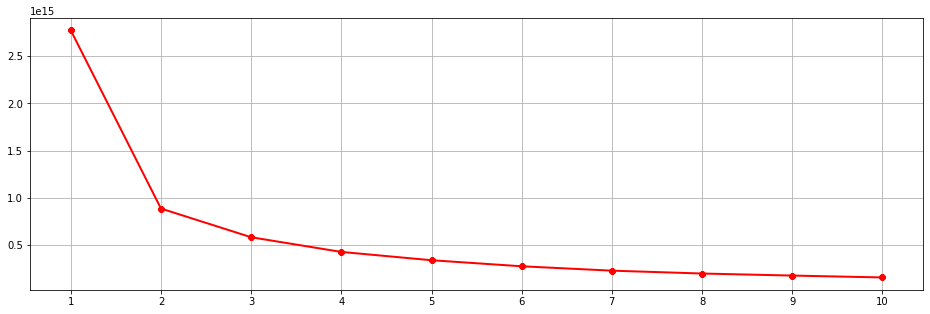

In [25]:
wcss=[]
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(car_dataframe[['Year', 'Price', 'Mileage', 'OptionCount', 'Accident Check', 'OwnershipHistory']])
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(16,5))
plt.grid()
plt.plot(range(1,11), wcss, linewidth=2, color='red', marker='8')
plt.xticks(np.arange(1,11,1))
plt.show()

As the partitoning method recommends us by calculating the Within-Cluster-Sum-of-Squares.

In [26]:
car_dfs = car_dataframe[['Year', 'Price', 'Mileage', 'OptionCount', 'Accident Check', 'OwnershipHistory']]
scaler = StandardScaler()
car_scaler = scaler.fit_transform(car_dfs)
kmeans = KMeans(n_clusters=4)
kmeans.fit(car_scaler)
car_dfs['cluster'] = kmeans.predict(car_scaler)
car_dataframe.loc[car_dfs.index, 'cluster'] = car_dfs.loc[car_dfs.index, 'cluster']
car_dataframe

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Title,Year,Location,State,Make,Model,BodyStyle,GasMileage_city,GasMileage_highway,Price,Mileage,Transmission,FuelType,Engine,Drivetrain,OptionCount,Accident Check,OwnershipHistory,cluster
0,Chevrolet Silverado 2500HD Work Truck Extende...,2010,Frankfort,KY,Chevrolet,Silverado 2500HD,pickup_truck,10.000000,12.000000,15900.0,144000.0,Automatic,Gasoline,V8,Four-Wheel Drive,2,0.0,2.0,0
1,Chevrolet Corvette Stingray 3LT Coupe RWD,2014,Lewistown,MT,Chevrolet,Corvette,coupe,15.470714,25.567207,49995.0,2500.0,7-Speed Manual,Gasoline,V8,Rear-Wheel Drive,5,0.0,1.0,1
2,Chevrolet Monte Carlo LS FWD,2004,Delavan,IL,Chevrolet,Monte Carlo,coupe,17.722222,27.595238,4890.0,115500.0,Automatic,Gasoline,V6,Front-Wheel Drive,1,0.0,3.0,0
3,Chevrolet Equinox 2LT FWD,2009,Delavan,IL,Chevrolet,Equinox,crossover,21.927684,29.948820,9960.0,80124.0,Automatic,Gasoline,V6,Front-Wheel Drive,4,0.0,2.0,0
4,Chevrolet Silverado 1500 LS Extended Cab LB RWD,2004,Delavan,IL,Chevrolet,Silverado 1500,pickup_truck,15.553415,21.352073,9220.0,103000.0,Automatic,Gasoline,V8,Rear-Wheel Drive,4,0.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1822640,FIAT 500L Easy,2014,Roy,UT,FIAT,500L,hatchback,23.388013,31.722397,6495.0,92501.0,Automatic,Gasoline,I4,Front-Wheel Drive,1,0.0,3.0,0
1822641,FIAT 500X Pop,2016,Shelbyville,IN,FIAT,500X,crossover,21.725191,30.470229,8745.0,74105.0,Automatic,Gasoline,I4,Front-Wheel Drive,2,0.0,2.0,0
1822642,FIAT 500X Trekking AWD,2016,Urbandale,IA,FIAT,500X,crossover,21.725191,30.470229,13916.0,27479.0,Automatic,Gasoline,I4,All-Wheel Drive,4,0.0,1.0,3
1822643,FIAT 500 Pop,2013,Phoenix,AZ,FIAT,500,hatchback,27.890446,35.056688,5500.0,69896.0,Automatic,Gasoline,I4,Front-Wheel Drive,0,0.0,1.0,0


In [27]:
car_dataframe['cluster'].value_counts()

3    876677
0    397548
1    351204
2    197216
Name: cluster, dtype: int64

Let's look into the cluster of the dataset grouped by each body style.

We'll pick one cluster containing the most products by each body style as the data source of the recommendation system.

In [28]:
car_dataframe.groupby('BodyStyle')['cluster'].value_counts()

BodyStyle     cluster
convertible   0           12659
              1            8722
              3            8546
              2            4770
coupe         3           23865
              1           18686
              0           18179
              2            9574
crossover     3          309407
              1          102840
              0           92260
              2           46689
hatchback     3           32311
              0           16026
              2            7329
              1            1924
minivan       3           28453
              0           14362
              2            6392
              1            5716
pickup_truck  3          106944
              1           67530
              0           53461
              2           19582
sedan         3          279528
              0          125947
              2           73730
              1           70909
suv           1           70245
              3           55243
              0   

So we set the scenario for the recommendation system will do for examination.

### Dealer Side

Providing optmial information required location of dealer's business area.  
Let's take Sacramento for example. The dealer plans to import 10 vehicles for selling.

First we have to check the marketshare distribution of each body style in Sacramento so that the number to determine on each bodystyle to import could be confirmed.

In [45]:
round(car_dataframe[(car_dataframe['Location']=='Sacramento')]['BodyStyle'].value_counts()/car_dataframe[(car_dataframe['Location']=='Sacramento')]['BodyStyle'].value_counts().sum()*10,0)

sedan           4.0
crossover       2.0
suv             1.0
pickup_truck    1.0
coupe           1.0
hatchback       1.0
wagon           0.0
minivan         0.0
convertible     0.0
van             0.0
Name: BodyStyle, dtype: float64

4 sedans, 2 crossovers, 1 pickup truck, 1 coupe, 1 hatchback as recommendation.

#### Sedan

Explore what are the most favorable models to choose based on each bodystyle.

In [48]:
sedan_index = car_dataframe[(car_dataframe['cluster']==0)&(car_dataframe['Location']=='Sacramento')&(gurus_dataframe['BodyStyle']=='sedan')]['Model'].value_counts().index[0:5]
sedan_index

Index(['3 Series', 'Accord', 'Civic', 'Camry', 'Corolla'], dtype='object')

used car conditional analysis as recommendation given the above five models.

In [194]:
sacramento_sedan = gurus_dataframe[(gurus_dataframe['cluster']==0)&(gurus_dataframe['Location']=='Sacramento')&(gurus_dataframe['BodyStyle']=='sedan')&(gurus_dataframe['Year']>2010)&(gurus_dataframe['Model'].isin(sedan_index))]

Marketshare of sedan in Sacramento based on manufactured year.

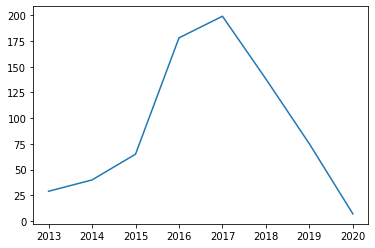

In [64]:
plt.plot(sacramento_sedan.groupby('Year').sum()['OptionCount'].index, sacramento_sedan.groupby('Year').sum()['OptionCount'])

Total number of each model.

<BarContainer object of 5 artists>

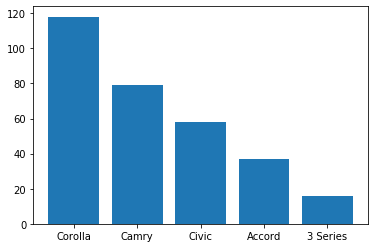

In [66]:
plt.bar(sacramento_sedan['Model'].value_counts().index, sacramento_sedan['Model'].value_counts())

Set the interquartile price range on each model as recommended price range. 

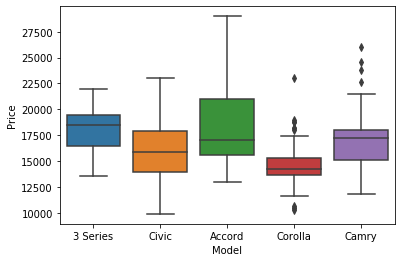

In [85]:
sns.boxplot(x=sacramento_sedan['Model'], y=sacramento_sedan['Price'])

Dataframe of interquartile price range based on each model.

In [120]:
sedan=pd.DataFrame()
sedan['Q1'] = sacramento_sedan.groupby('Model')['Price'].quantile(.25)
sedan['Median'] = sacramento_sedan.groupby('Model')['Price'].median()
sedan['Q3'] = sacramento_sedan.groupby('Model')['Price'].quantile(.75)
sedan

,Q1,Median,Q3
Model,,,
3 Series,16446.25,18490.0,19494.5
Accord,15595.00,16997.0,20995.0
Camry,15145.00,17197.0,17976.0
Civic,13995.00,15884.0,17903.5
Corolla,13615.25,14247.0,15297.0


Mileage box chart based on the five models.

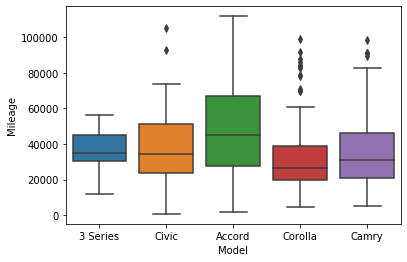

In [196]:
sns.boxplot(x='Model', y='Mileage', data=sacramento_sedan)

In [121]:
sedan=pd.DataFrame()
sedan['Q1'] = sacramento_sedan.groupby('Model')['Mileage'].quantile(.25)
sedan['Median'] = sacramento_sedan.groupby('Model')['Mileage'].median()
sedan['Q3'] = sacramento_sedan.groupby('Model')['MileageDataframe of interquartile price range based on each model.'].quantile(.75)
sedan

,Q1,Median,Q3
Model,,,
3 Series,30566.00,35085.0,45322.75
Accord,27399.00,44813.0,66707.00
Camry,20758.00,31006.0,46119.00
Civic,23874.25,34620.5,51091.50
Corolla,19957.50,26379.0,38815.25


Dataframe of interquartile mileage range based on each model.

In [89]:
print('Median number of ownership history :',sacramento_sedan['OwnershipHistory'].median())
print('Accident number :',sacramento_sedan['Accident Check'].median())

Median number of ownership history : 1.0
Accident number : 0.0


The market in Sacramento expects one-owned car and clean of accident.

### Crossover

Explore what are the most favorable models to choose based on each bodystyle.

In [91]:
crossover_index = gurus_dataframe[(gurus_dataframe['cluster']==3)&(gurus_dataframe['Location']=='Sacramento')&(gurus_dataframe['BodyStyle']=='crossover')]['Model'].value_counts().index[0:5]
crossover_index

Index(['CR-V', 'Pilot', 'Rogue', 'Explorer', 'MDX'], dtype='object')

used car conditional analysis as recommendation given the above five models.

In [198]:
crossover_data= gurus_dataframe[(gurus_dataframe['Model'].isin(crossover_index))&(gurus_dataframe['cluster']==3)&(gurus_dataframe['Location']=='Sacramento')&(gurus_dataframe['Year']>=2010)]

Marketshare of crossover in Sacramento based on manufactured year.

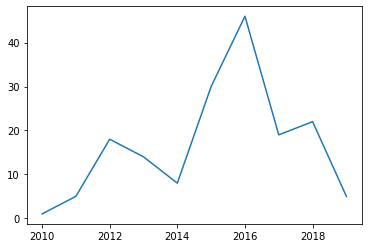

In [199]:
plt.plot(crossover_data.groupby('Year').sum()['OptionCount'].index, crossover_data.groupby('Year').sum()['OptionCount'])

Total number of each model.

<BarContainer object of 5 artists>

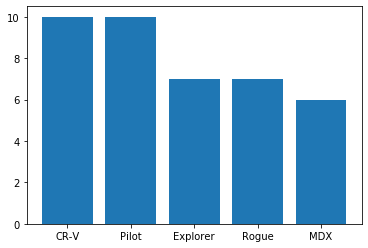

In [96]:
plt.bar(crossover_data['Model'].value_counts().index, crossover_data['Model'].value_counts())

Set the interquartile price range on each model as recommended price range.

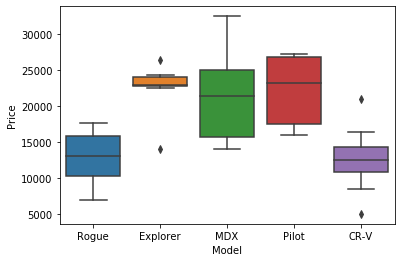

In [97]:
sns.boxplot(x=crossover_data['Model'], y=crossover_data['Price'])

Dataframe of interquartile price range based on each model.

In [200]:
crossover=pd.DataFrame()
crossover['Q1'] = crossover_data.groupby('Model')['Price'].quantile(.25)
crossover['Median'] = crossover_data.groupby('Model')['Price'].median()
crossover['Q3'] = crossover_data.groupby('Model')['Price'].quantile(.75)
crossover

,Q1,Median,Q3
Model,,,
CR-V,11895.50,13495.0,14965.00
Explorer,22743.50,22998.0,24038.00
MDX,15712.25,21385.5,24967.75
Pilot,17508.00,23247.0,26870.00
Rogue,10247.00,13063.0,15844.50


Mileage box chart based on the five models.

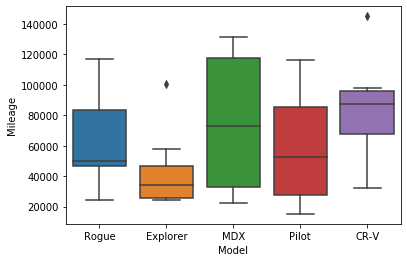

In [98]:
sns.boxplot(x=crossover_data['Model'], y=crossover_data['Mileage'])

Dataframe of interquartile mileage range based on each model.

In [117]:
crossover=pd.DataFrame()
crossover['Q1'] = crossover_data.groupby('Model')['Mileage'].quantile(.25)
crossover['Median'] = crossover_data.groupby('Model')['Mileage'].median()
crossover['Q3'] = crossover_data.groupby('Model')['Mileage'].quantile(.75)
crossover

,Q1,Median,Q3
Model,,,
CR-V,67981.25,87172.0,95840.75
Explorer,25501.50,34324.0,46723.50
MDX,33081.25,72839.0,117629.25
Pilot,27900.00,52341.0,85284.75
Rogue,46489.00,49856.0,83418.50


In [116]:
print('Median number of ownership history :',crossover_data['OwnershipHistory'].median())
print('Accident Number :',crossover_data['Accident Check'].median())

Median number of ownership history : 1.0
Accident Number : 1.0


Allowance for accident count is limited to 1. The market prefers one owner car.

Then another case is personal-use vehicle for sale.
We set Focus(Hatchback) as product which offers analysis information as followed:

Extract conditional dataset

In [169]:
personal_use=car_dataframe[(car_dataframe['cluster']==3)&(car_dataframe['Model']=='Focus')&(car_dataframe['Year']>2010)&(car_dataframe['Mileage']<20000)]

In [170]:
personal_use

,Title,Year,Location,State,Make,Model,BodyStyle,GasMileage_city,GasMileage_highway,Price,Mileage,Transmission,FuelType,Engine,Drivetrain,OptionCount,Accident Check,OwnershipHistory,cluster
438400,Ford Focus SE,2017,Warrensburg,NY,Ford,Focus,sedan,25.230727,35.512922,14500.0,13978.0,Automatic,Flex Fuel Vehicle,I4 Flex Fuel Vehicle,Front-Wheel Drive,0,0.0,1.0,3
438420,Ford Focus SE,2017,Ainsworth,NE,Ford,Focus,sedan,25.230727,35.512922,16200.0,5309.0,Automatic,Flex Fuel Vehicle,I4 Flex Fuel Vehicle,Front-Wheel Drive,1,0.0,1.0,3
438500,Ford Focus SE Hatchback,2017,Warrensburg,NY,Ford,Focus,hatchback,25.230727,35.512922,15000.0,11028.0,Automatic,Flex Fuel Vehicle,I4 Flex Fuel Vehicle,Front-Wheel Drive,0,1.0,1.0,3
438567,Ford Focus SEL,2017,Rio Grande City,TX,Ford,Focus,sedan,25.230727,35.512922,16995.0,3937.0,Automatic,Flex Fuel Vehicle,I4 Flex Fuel Vehicle,Front-Wheel Drive,3,0.0,2.0,3
438636,Ford Focus SE Hatchback,2014,Hollywood,FL,Ford,Focus,hatchback,25.230727,35.512922,6499.0,11168.0,6-Speed Automatic,Flex Fuel Vehicle,I4 Flex Fuel Vehicle,Front-Wheel Drive,2,1.0,1.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
657367,Ford Focus ST,2018,Columbia,SC,Ford,Focus,hatchback,25.230727,35.512922,21998.0,10361.0,Manual,Gasoline,I4,Front-Wheel Drive,3,0.0,1.0,3
657376,Ford Focus SE,2017,Wichita,KS,Ford,Focus,sedan,25.230727,35.512922,13998.0,12856.0,Automatic,Flex Fuel Vehicle,I4 Flex Fuel Vehicle,Front-Wheel Drive,4,0.0,1.0,3
657424,Ford Focus SE,2017,Charlotte,NC,Ford,Focus,sedan,25.230727,35.512922,11981.0,15298.0,Automatic,Flex Fuel Vehicle,I4 Flex Fuel Vehicle,Front-Wheel Drive,1,0.0,1.0,3
657574,Ford Focus ST,2017,Graham,NC,Ford,Focus,hatchback,25.230727,35.512922,18000.0,15482.0,6-Speed Manual,Gasoline,I4,Front-Wheel Drive,1,0.0,3.0,3


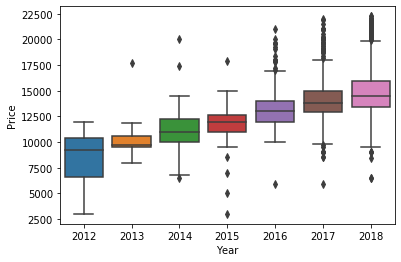

In [171]:
sns.boxplot(x=personal_use['Year'], y=personal_use['Price'])

In [174]:
Focus = pd.DataFrame()
Focus['Q1'] = personal_use.groupby('Year')['Price'].quantile(.25)
Focus['Median'] = personal_use.groupby('Year')['Price'].quantile(.5)
Focus['Q3'] = personal_use.groupby('Year')['Price'].quantile(.75)
Focus

,Q1,Median,Q3
Year,,,
2012,6608.50,9222.0,10370.00
2013,9475.00,9750.0,10595.00
2014,9979.25,10947.5,12224.25
2015,10995.00,11989.0,12599.00
2016,11988.00,12988.0,13987.25
2017,12889.75,13831.0,14998.00
2018,13367.25,14499.5,15981.00


### Customer 

This case is set for hatchback searching with the budget of 30,000 USD in Sacramento.

In [178]:
hatchback = gurus_dataframe[(car_dataframe['Year']>=2010)&(car_dataframe['cluster']==3)&(car_dataframe['State']=='CA')&(car_dataframe['Price']<30000)&(car_dataframe['BodyStyle']=='hatchback')]
hatchback

,Title,Year,Location,State,Make,Model,BodyStyle,GasMileage_city,GasMileage_highway,Price,Mileage,Transmission,FuelType,Engine,Drivetrain,OptionCount,Accident Check,OwnershipHistory,cluster
1103,Chevrolet Volt LT FWD,2016,Montclair,CA,Chevrolet,Volt,hatchback,40.176044,41.294011,15999.0,38026.0,Automatic,Gasoline,I4,Front-Wheel Drive,1,0.0,1.0,0
2470,Chevrolet Spark 1LT FWD,2017,Corning,CA,Chevrolet,Spark,hatchback,29.993884,38.560856,13995.0,36083.0,Automatic,Gasoline,I4,Front-Wheel Drive,0,0.0,1.0,0
2919,Chevrolet Volt FWD,2015,Modesto,CA,Chevrolet,Volt,hatchback,40.176044,41.294011,15000.0,17495.0,Automatic,Gasoline,I4,Front-Wheel Drive,4,0.0,1.0,0
2926,Chevrolet Volt LT FWD,2016,Montclair,CA,Chevrolet,Volt,hatchback,40.176044,41.294011,15599.0,33654.0,Automatic,Gasoline,I4,Front-Wheel Drive,5,1.0,1.0,3
3298,Chevrolet Volt LT FWD,2016,Montclair,CA,Chevrolet,Volt,hatchback,40.176044,41.294011,15899.0,44231.0,Automatic,Gasoline,I4,Front-Wheel Drive,2,0.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1822481,FIAT 500 Pop,2013,Oceanside,CA,FIAT,500,hatchback,27.890446,35.056688,6850.0,46139.0,Automatic,Gasoline,I4,Front-Wheel Drive,1,0.0,1.0,0
1822505,FIAT 500 Pop Hatchback FWD,2017,Costa Mesa,CA,FIAT,500,hatchback,27.890446,35.056688,8600.0,50342.0,4-Speed Automatic,Gasoline,I4,Front-Wheel Drive,1,0.0,1.0,0
1822558,FIAT 500L Pop,2014,San Diego,CA,FIAT,500L,hatchback,23.388013,31.722397,10100.0,46566.0,6-Speed Manual,Gasoline,I4,Front-Wheel Drive,2,0.0,2.0,0
1822565,FIAT 500L Lounge,2015,Montclair,CA,FIAT,500L,hatchback,23.388013,31.722397,9595.0,86344.0,6-Speed Automatic,Gasoline,I4,Front-Wheel Drive,5,0.0,1.0,0


Explore what are the most favorable models to choose based on hatchback.

In [191]:
hatchback['Model'].value_counts().index[0:3]

Index(['Prius', 'Volt', 'Focus'], dtype='object')

### Prius

Price distribution of Prius by each year.

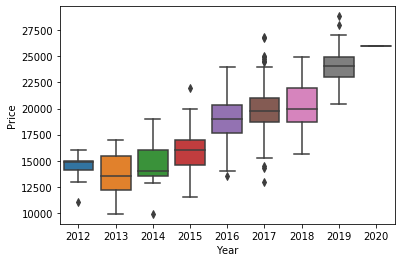

In [186]:
sns.boxplot(hatchback[hatchback['Model']=='Prius']['Year'], hatchback[hatchback['Model']=='Prius']['Price'])

Mileage distribution of Prius by each year.

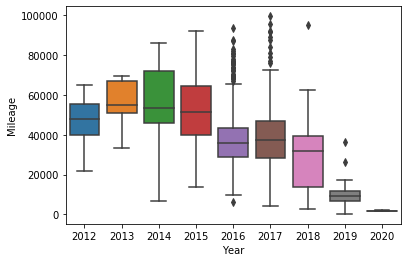

In [187]:
sns.boxplot(hatchback[hatchback['Model']=='Prius']['Year'], hatchback[hatchback['Model']=='Prius']['Mileage'])

### Volt

Price distribution of Volt by each year.

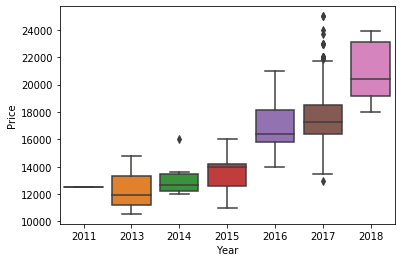

In [189]:
sns.boxplot(hatchback[hatchback['Model']=='Volt']['Year'], hatchback[hatchback['Model']=='Volt']['Price'])

Mileage distribution of Volt by each year.

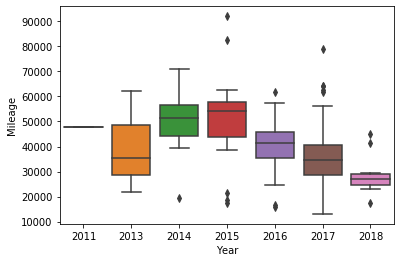

In [190]:
sns.boxplot(hatchback[hatchback['Model']=='Volt']['Year'], hatchback[hatchback['Model']=='Volt']['Mileage'])

### Focus

Price distribution of Focus by each year.

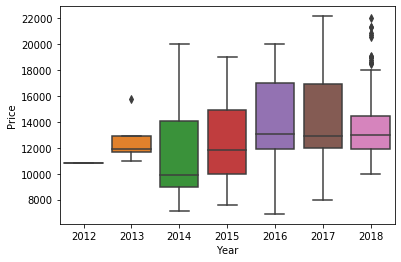

In [192]:
sns.boxplot(hatchback[hatchback['Model']=='Focus']['Year'], hatchback[hatchback['Model']=='Focus']['Price'])

Mileage distribution of Focus by each year.

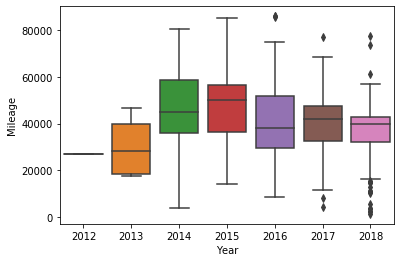

In [193]:
sns.boxplot(hatchback[hatchback['Model']=='Focus']['Year'], hatchback[hatchback['Model']=='Focus']['Mileage'])